# Part 1: Data Preprocessing


Dataset Link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?resource=download

# Importing the libraries and datasets


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Car details v3.csv')

In [3]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Data exploration

In [4]:
dataset.shape

(8128, 13)

In [5]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
dataset.select_dtypes(include = 'object').columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'torque'],
      dtype='object')

In [8]:
len(dataset.select_dtypes(include = 'object').columns)

9

In [9]:
#numeric columns
dataset.select_dtypes(include = ['float64', 'int64']).columns



Index(['year', 'selling_price', 'km_driven', 'seats'], dtype='object')

In [10]:
len(dataset.select_dtypes(include = ['float64', 'int64']).columns)

4

In [11]:
dataset.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# Dealing with missing values


In [12]:
dataset.isnull().values.any()

True

In [13]:
dataset.isnull().values.sum()

1100

In [14]:
dataset = dataset.dropna()

In [15]:
dataset.isnull().values.any()

False

In [16]:
dataset.isnull().values.sum()

0

In [17]:
dataset.shape

(7906, 13)

# Restructuring dataset


In [18]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [19]:
dataset = dataset.drop(columns='name')


In [20]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [21]:
#add a column
dataset['Current Year'] = 2024

In [22]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Current Year
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2024
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2024
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2024
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2024
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,2024


In [23]:
dataset['Years Old'] = dataset['Current Year'] - dataset['year']

In [24]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Current Year,Years Old
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2024,10
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2024,10
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2024,18
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2024,14
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,2024,17


In [25]:
dataset = dataset.drop(columns=['Current Year'])

In [26]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Years Old
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,10
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,10
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,18
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,14
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,17


# Encoding categorical data


In [27]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Years Old
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,10
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,10
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,18
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,14
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,17


In [28]:
# Remove ' kmpl' or ' km/kg' suffix and convert to float
dataset['mileage'] = dataset['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)


In [29]:
dataset['engine'] = dataset['engine'].str.replace(' CC', '').astype(float)


In [30]:

# Remove ' bhp' suffix and convert to float
dataset['max_power'] = dataset['max_power'].str.replace(' bhp', '').astype(float)


In [31]:
dataset.drop(columns = ['torque'])

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Years Old
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,10
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,10
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,18
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,14
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,11
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,17
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,15
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,11


In [32]:
dataset.select_dtypes(include='object').columns

Index(['fuel', 'seller_type', 'transmission', 'owner', 'torque'], dtype='object')

In [33]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Years Old
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,10
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,10
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,18
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,14
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,17


In [34]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Years Old
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,10
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,10
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,18
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,14
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,17


In [35]:
dataset = dataset.drop(columns=['torque'])

In [36]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Years Old
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,10
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,10
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,18
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,14
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,17


In [37]:
dataset.select_dtypes(include='object').columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [38]:
dataset = dataset.drop(columns=['seller_type'])

In [39]:
dataset.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,Years Old
0,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0,10
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0,10
2,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0,18
3,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0,14
4,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0,17


In [40]:
dataset.select_dtypes(include='object').columns

Index(['fuel', 'transmission', 'owner'], dtype='object')

In [41]:
dataset['fuel'].nunique()

4

In [42]:
dataset['transmission'].nunique()

2

In [43]:
unique_owners = dataset['owner'].value_counts()


In [44]:
dataset['owner'].unique()


array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [45]:
(dataset['owner'] == 'Test Drive Car').sum()

5

In [46]:
dataset = dataset[dataset['owner'] != 'Test Drive Car']

In [47]:
dataset['owner'].unique()


array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [48]:
label_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}

# Create a new column 'owner_label' with the mapped labels
dataset['owner_label'] = dataset['owner'].map(label_mapping)


In [49]:
dataset.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,Years Old,owner_label
0,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0,10,1
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0,10,2
2,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0,18,3
3,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0,14,1
4,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0,17,1


In [50]:
dataset=dataset.drop(columns=['owner'])

In [51]:
dataset.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats,Years Old,owner_label
0,2014,450000,145500,Diesel,Manual,23.40,1248.0,74.00,5.0,10,1
1,2014,370000,120000,Diesel,Manual,21.14,1498.0,103.52,5.0,10,2
2,2006,158000,140000,Petrol,Manual,17.70,1497.0,78.00,5.0,18,3
3,2010,225000,127000,Diesel,Manual,23.00,1396.0,90.00,5.0,14,1
4,2007,130000,120000,Petrol,Manual,16.10,1298.0,88.20,5.0,17,1


In [52]:
print(dataset)

      year  selling_price  km_driven    fuel transmission  mileage  engine  \
0     2014         450000     145500  Diesel       Manual    23.40  1248.0   
1     2014         370000     120000  Diesel       Manual    21.14  1498.0   
2     2006         158000     140000  Petrol       Manual    17.70  1497.0   
3     2010         225000     127000  Diesel       Manual    23.00  1396.0   
4     2007         130000     120000  Petrol       Manual    16.10  1298.0   
...    ...            ...        ...     ...          ...      ...     ...   
8123  2013         320000     110000  Petrol       Manual    18.50  1197.0   
8124  2007         135000     119000  Diesel       Manual    16.80  1493.0   
8125  2009         382000     120000  Diesel       Manual    19.30  1248.0   
8126  2013         290000      25000  Diesel       Manual    23.57  1396.0   
8127  2013         290000      25000  Diesel       Manual    23.57  1396.0   

      max_power  seats  Years Old  owner_label  
0         74.0

In [53]:
dataset.select_dtypes(include='object').columns

Index(['fuel', 'transmission'], dtype='object')

In [54]:
dataset['fuel'].nunique()

4

In [55]:
dataset['transmission'].nunique()

2

In [56]:
dataset.shape

(7901, 11)

In [57]:
#one hot encodign
dataset = pd.get_dummies(data=dataset, drop_first = True)

In [58]:
dataset.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Years Old,owner_label,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,2014,450000,145500,23.40,1248.0,74.00,5.0,10,1,True,False,False,True
1,2014,370000,120000,21.14,1498.0,103.52,5.0,10,2,True,False,False,True
2,2006,158000,140000,17.70,1497.0,78.00,5.0,18,3,False,False,True,True
3,2010,225000,127000,23.00,1396.0,90.00,5.0,14,1,True,False,False,True
4,2007,130000,120000,16.10,1298.0,88.20,5.0,17,1,False,False,True,True


In [59]:
dataset.shape

(7901, 13)

# Correlation Matrix


In [60]:
dataset_2 = dataset.drop(columns='selling_price')

<Axes: title={'center': 'Correlated with Selling Price'}>

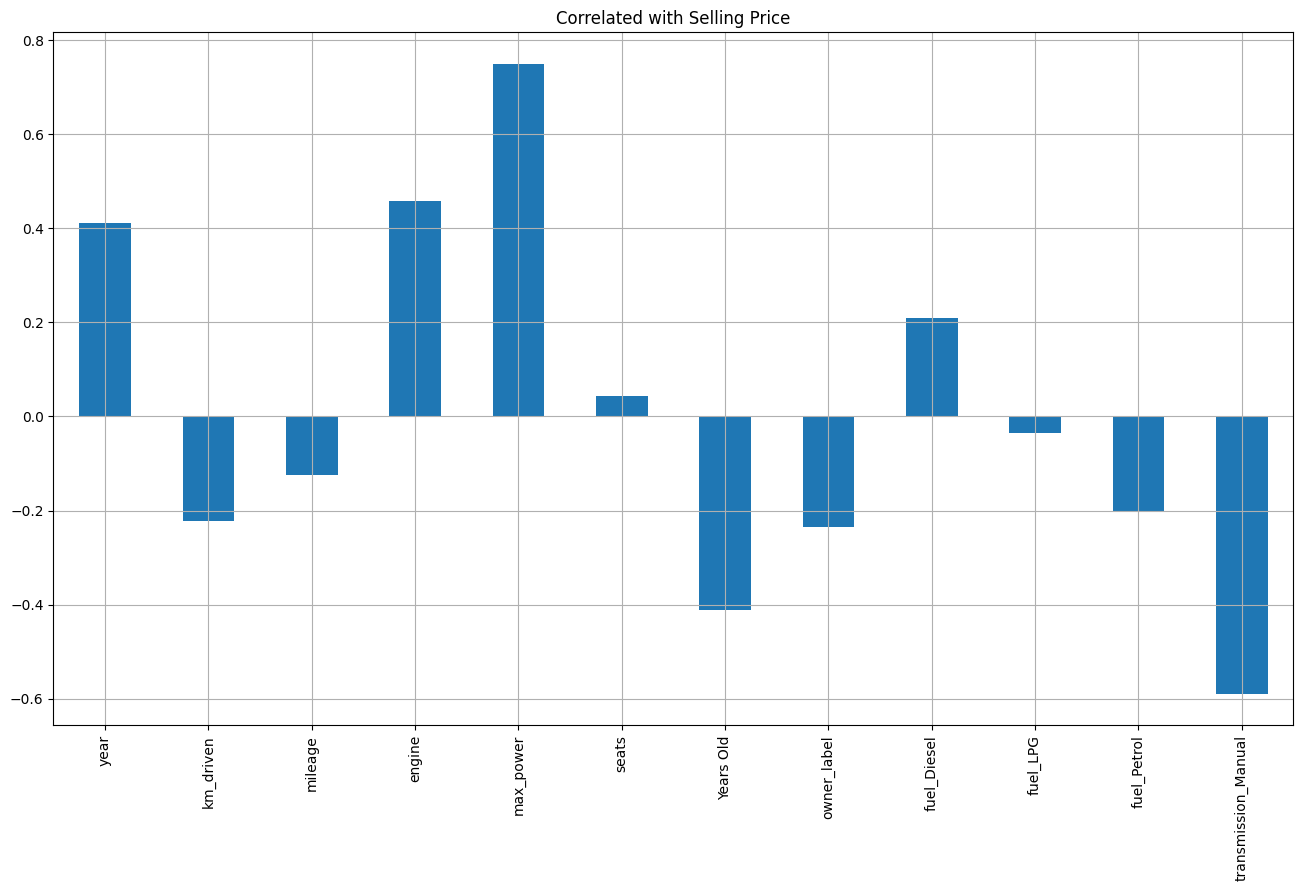

In [61]:
dataset_2.corrwith(dataset['selling_price']).plot.bar(
    figsize = (16,9), title = ("Correlated with Selling Price"), grid= True
)

In [62]:
corr = dataset.corr()

<Axes: >

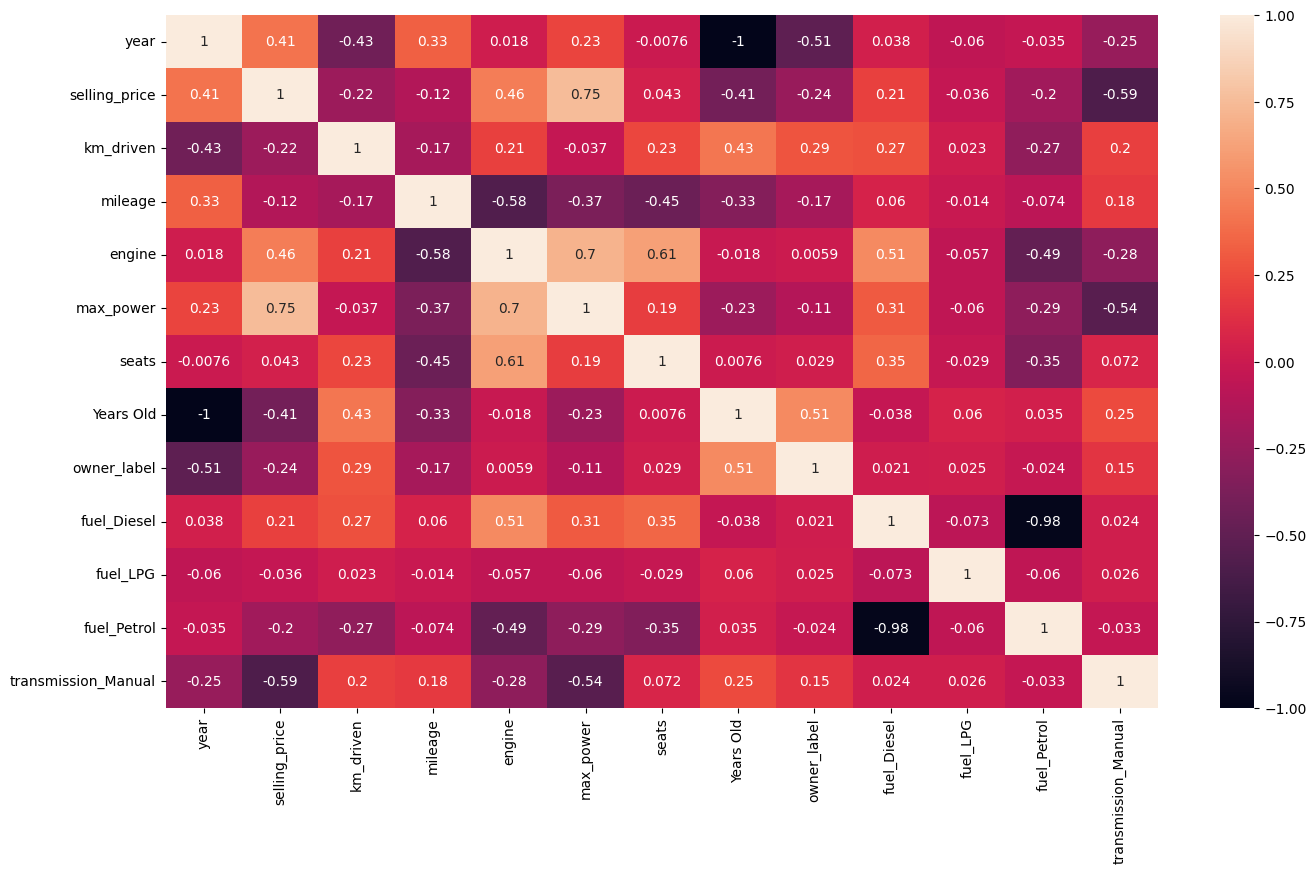

In [63]:
# heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot = True)

# Splitting the dataset


In [64]:
dataset.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Years Old,owner_label,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,2014,450000,145500,23.40,1248.0,74.00,5.0,10,1,True,False,False,True
1,2014,370000,120000,21.14,1498.0,103.52,5.0,10,2,True,False,False,True
2,2006,158000,140000,17.70,1497.0,78.00,5.0,18,3,False,False,True,True
3,2010,225000,127000,23.00,1396.0,90.00,5.0,14,1,True,False,False,True
4,2007,130000,120000,16.10,1298.0,88.20,5.0,17,1,False,False,True,True


In [65]:
# matrix of feature
x = dataset.drop(columns='selling_price')

In [66]:
#target variable
y = dataset['selling_price']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
x_train.shape

(6320, 12)

In [69]:
y_train.shape

(6320,)

In [70]:
x_test.shape

(1581, 12)

In [71]:
y_test.shape

(1581,)

In [72]:
dataset.to_csv('cleaned_data.csv', index=False)

# Part 2: Building the model


# 1. Linear Regression


In [73]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [74]:
y_pred = regressor_mlr.predict(x_test)

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y_test, y_pred)

0.6671205695318632

# 2. Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [78]:
regressor_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
y_pred = regressor_rf.predict(x_test)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.97869441124341

# Part 3: Finding the optimal parameters using RandomizedSearchCV

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],  # Corrected parameter values
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [83]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [84]:
random_cv = RandomizedSearchCV(estimator=regressor_rf, param_distributions=parameters, n_iter=10,
                               scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)


In [85]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [86]:
random_cv.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_depth=50,
                      max_features='log2', min_samples_split=5,
                      n_estimators=200)

In [87]:
random_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50,
 'criterion': 'friedman_mse'}

# Final Model (Random Forest)

In [88]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion='squared_error',
    max_depth=None,
    max_features=1.0,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

model = RandomForestRegressor()

regressor.fit(x_train, y_train)

RandomForestRegressor()

In [89]:
y_pred = regressor.predict(x_test)

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9785858642189453

In [91]:
x_test.head()

,year,km_driven,mileage,engine,max_power,seats,Years Old,owner_label,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
5059,2007,120000,17.70,1497.0,78.0,5.0,17,2,False,False,True,True
5046,2017,40000,18.16,1196.0,86.8,5.0,7,2,False,False,True,True
2376,2012,67998,18.90,998.0,67.1,5.0,12,1,False,False,True,True
7154,2008,120000,18.70,1896.0,66.0,5.0,16,2,True,False,False,True
3641,2011,500000,18.90,998.0,67.1,5.0,13,2,False,False,True,True


In [96]:
new_data = pd.DataFrame({
    'year': [2011],
    'km_driven': [20000],
    'mileage': [16.5],
    'engine': [1600.0],
    'max_power': [81.86],
    'seats': [5],
    'Years Old': [1],
    'owner_label': [3],
    'fuel_Diesel': [1],
    'fuel_LPG': [0],
    'fuel_Petrol': [0],
    'transmission_Manual': [1]
})

# Make predictions
predictions = regressor.predict(new_data)
print(predictions)

[512939.99]


In [93]:
import joblib

In [94]:
joblib.dump(regressor, 'regressor2.pkl')

['regressor2.pkl']